##  Perform sentimental analysis on the Elon-musk tweets

In [3]:
!pip install spacy
!pip install wordcloud


In [4]:
!pip3 install tweepy
!pip3 install textblob


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [6]:
data=pd.read_csv("Elon_musk.csv",error_bad_lines=False,sep=",", encoding='cp1252')

In [7]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [9]:
data.shape

(1999, 2)

In [10]:
import re
# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text
# Clean The Text
data["Text"] = data["Text"].apply(cleantext)
data.head()

,Unnamed: 0,Text
0,1,I’m an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...


In [11]:
data.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [12]:
data

,Unnamed: 0,Text
0,1,I’m an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...
...,...,...
1994,1995,"True, it sounds so surreal, but the negative ..."
1995,1996,Make sure to read ur terms &amp; conditions b...
1996,1997,Samwise Gamgee
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...


In [13]:
from textblob import TextBlob
# Get The Subjectivity
def sentiment_analysis(data):
    sentiment = TextBlob(data["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
# Adding Subjectivity & Polarity
data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)
data

,Unnamed: 0,Text,subjectivity,polarity
0,1,I’m an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


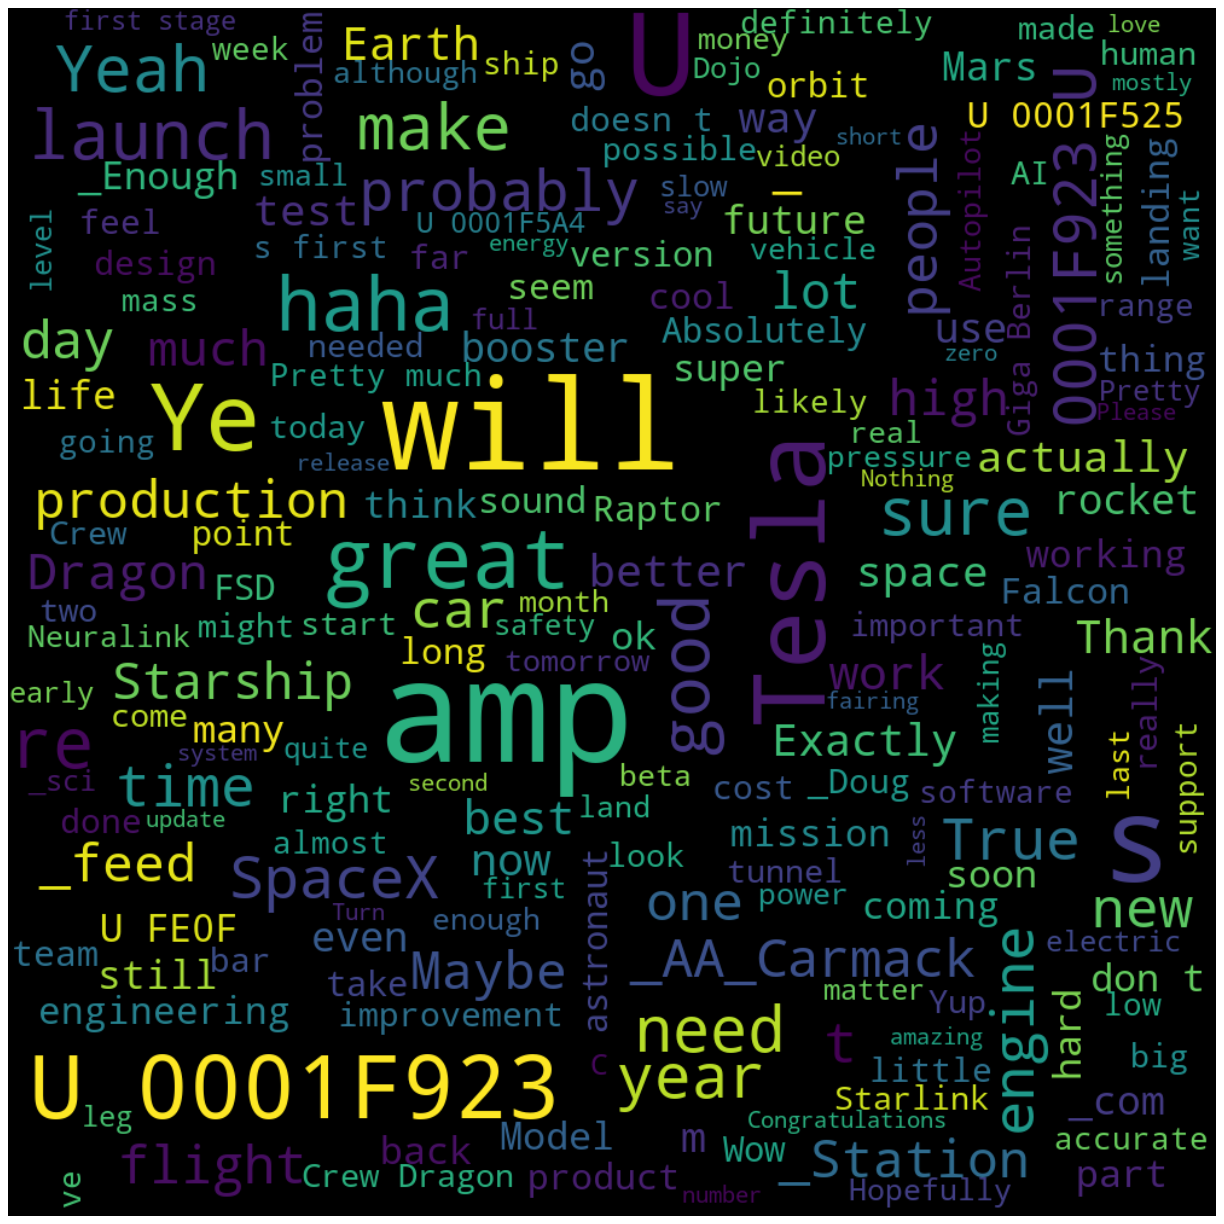

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in data["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [15]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
data["analysis"] = data["polarity"].apply(analysis)
# Print The Data
data

,Unnamed: 0,Text,subjectivity,polarity,analysis
0,1,I’m an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


### The polarity is a value ranging between -1 and 1, with -1 being very negative and +1 very positive. The subjectivity ranges between 0 and 1, and refers to the person’s opinion, emotion, or even judgment. The higher the number, the more subjective the text is.

/home/sachin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='polarity', ylabel='Density'>

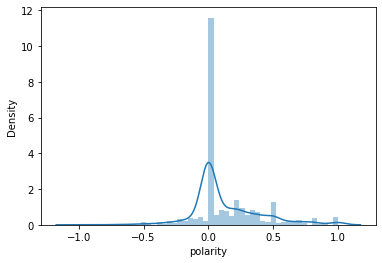

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data['polarity'])

<AxesSubplot:ylabel='polarity'>

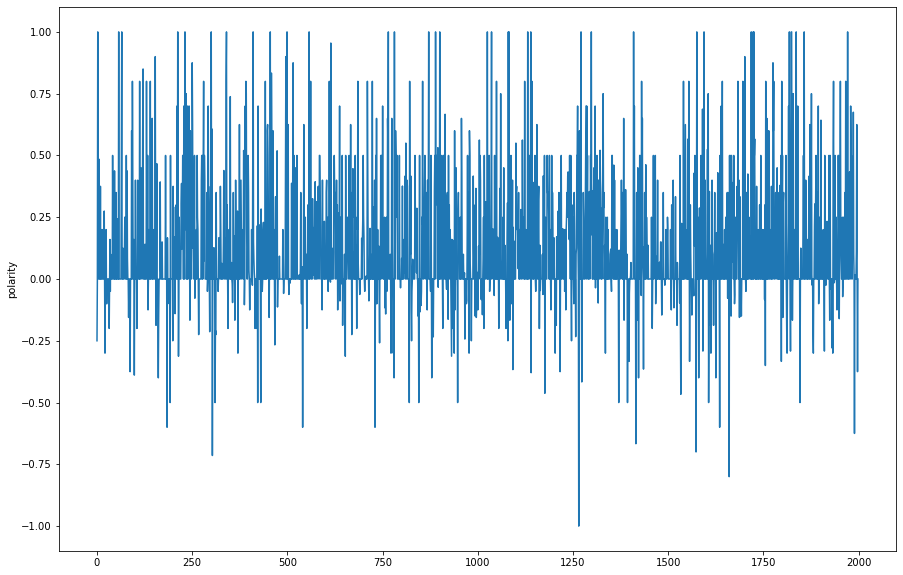

In [23]:
sent_df = data['polarity']
plt.figure(figsize=(15, 10))
sns.lineplot(data=sent_df)


In [25]:

positive_tweets = data[data['analysis'] == 'Positive']
negative_tweets = data[data['analysis'] == 'Negative']
print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])
print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])

positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 - I’m an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don… 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or… 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

That’s what you’re missing.


### Because of the nature of his tweets, some may be incorrectly classified.